<a href="https://colab.research.google.com/github/snkotanyi/BUSI651-M-Learning/blob/main/Part_B_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import files

uploadedfile = files.upload()

Saving train.csv to train.csv


In [53]:
titanic_data = pd.read_csv('train.csv')


In [52]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [23]:
titanic_data.shape


(891, 12)

In [54]:
# Print the column names
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [55]:
# Step 2: Preprocess the data
# Remove irrelevant columns
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)


In [56]:
# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=["Sex", "Embarked"])

# Replace missing values with the mean value of the column
titanic_data = titanic_data.fillna(titanic_data.mean())

In [41]:
# Step 3: Split the dataset
from sklearn.model_selection import train_test_split
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

Step4: Building the Model

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
inputs = tf.keras.Input(shape=[X_train.shape[1]])
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [60]:
# Step 4: Build the model
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Dense(64, activation="relu", input_shape=[X_train.shape[1]]),
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])


Training the ANN model with 20% (0.2) of the data 

In [64]:
# Step 5: Train the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=15, validation_split=0.2)



Epoch 1/50
38/38 [==============================] - 1s 7ms/step - loss: 0.4372 - accuracy: 0.8243 - val_loss: 0.6440 - val_accuracy: 0.7343
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8489 - val_loss: 0.5498 - val_accuracy: 0.7483
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8453 - val_loss: 0.4505 - val_accuracy: 0.8042
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.8471 - val_loss: 0.4435 - val_accuracy: 0.7972
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8612 - val_loss: 0.4479 - val_accuracy: 0.8182
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8366 - val_loss: 0.4521 - val_accuracy: 0.7902
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8330 - val_loss: 0.6159 - val_accuracy: 0.7343
Epoch 8/50
38/38 [==

In [66]:
#Model Evaluation 
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.7374


[0.5606281757354736, 0.7374301552772522]

Obtain the accuracy and loss values for both the training and validation sets at each epoch during the model training process.

In [67]:
history = model.fit(X_train, y_train, epochs=50, batch_size=15, validation_split=0.2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


Epoch 1/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4269 - accuracy: 0.8084 - val_loss: 0.4495 - val_accuracy: 0.7692
Epoch 2/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4055 - accuracy: 0.8190 - val_loss: 0.4627 - val_accuracy: 0.7552
Epoch 3/50
38/38 [==============================] - 0s 8ms/step - loss: 0.3994 - accuracy: 0.8295 - val_loss: 0.4597 - val_accuracy: 0.7552
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.4047 - accuracy: 0.8049 - val_loss: 0.4395 - val_accuracy: 0.8112
Epoch 5/50
38/38 [==============================] - 0s 13ms/step - loss: 0.4504 - accuracy: 0.8102 - val_loss: 0.5318 - val_accuracy: 0.7762
Epoch 6/50
38/38 [==============================] - 0s 10ms/step - loss: 0.4076 - accuracy: 0.8348 - val_loss: 0.4388 - val_accuracy: 0.7832
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4249 - accuracy: 0.8225 - val_loss: 0.5284 - val_accuracy: 0.7622
Epoch 8/50
38/3

In [72]:
# Calculate the average training and validation loss
avg_train_loss = sum(train_loss) / len(train_loss)
avg_val_loss = sum(val_loss) / len(val_loss)


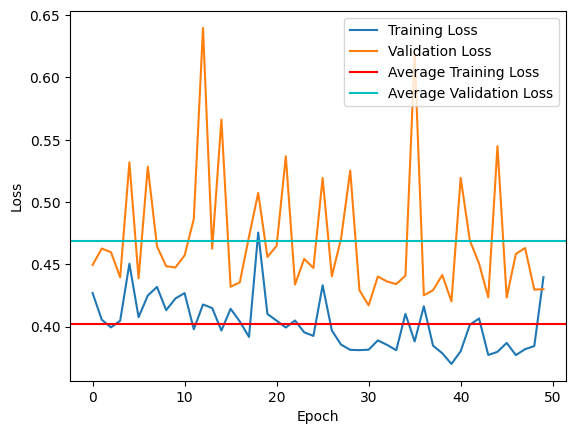

In [76]:
# Create the plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=avg_train_loss, color='r', label='Average Training Loss')
plt.axhline(y=avg_val_loss, color='c', label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

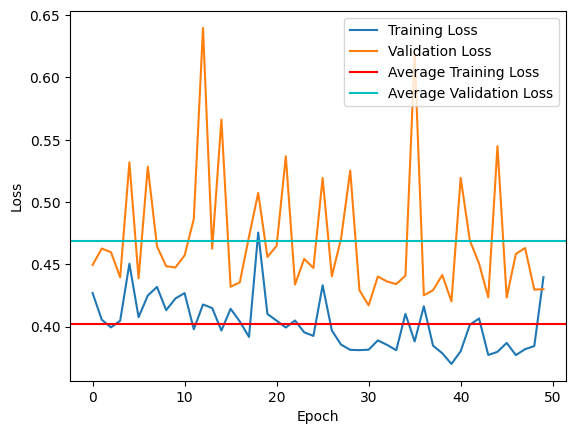

In [77]:
# Plot the average training and validation loss over the course of training
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=avg_train_loss, color='r', label='Average Training Loss')
plt.axhline(y=avg_val_loss, color='c', label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# Calculate the average accuracy for each epoch
avg_train_acc = np.mean(train_acc)
avg_val_acc = np.mean(val_acc)


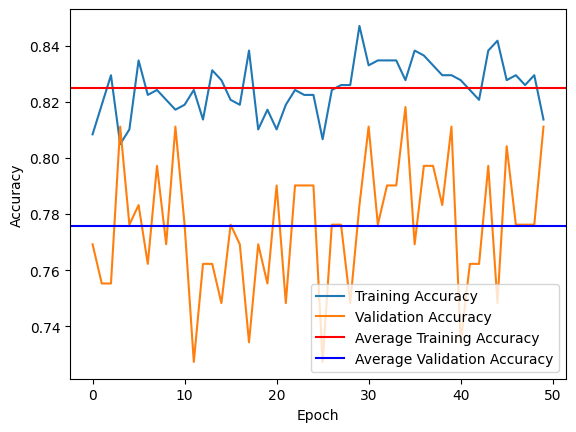

In [71]:
# Plot the average training and validation accuracy over the course of training
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=avg_train_acc, color='r', label='Average Training Accuracy')
plt.axhline(y=avg_val_acc, color='b', label='Average Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
